In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from numpy import corrcoef,array
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel(r'C:\Users\11060\Desktop\毕业论文数据集\house_info.xlsx')
data.head()

,area,built_date,elevator,floor,house_decorate,house_orientation,house_position,room_num,keting_num,subway,unit_price
0,437.00,2016,1,中楼层,精装,南,天河,4,2,0,12.2884
1,91.27,2013,1,高楼层,精装,东南,天河,3,2,1,11.6139
2,30.00,2003,1,中楼层,简装,北,天河,1,0,0,11.1667
3,67.00,2014,1,高楼层,精装,东北,天河,2,2,1,10.8956
4,66.95,2014,1,中楼层,精装,东,天河,2,2,1,10.7543


In [4]:
matplotlib.rcParams['axes.unicode_minus']=False  #解决保存图像时负号'-'显示为方块的问题
plt.rcParams['font.sans-serif'] = ['SimHei']   #指定默认字体 

,天河,海珠,白云,番禺,荔湾,黄埔,越秀,增城,花都
value_counts,2390,2295,1740,1652,883,867,474,327,250


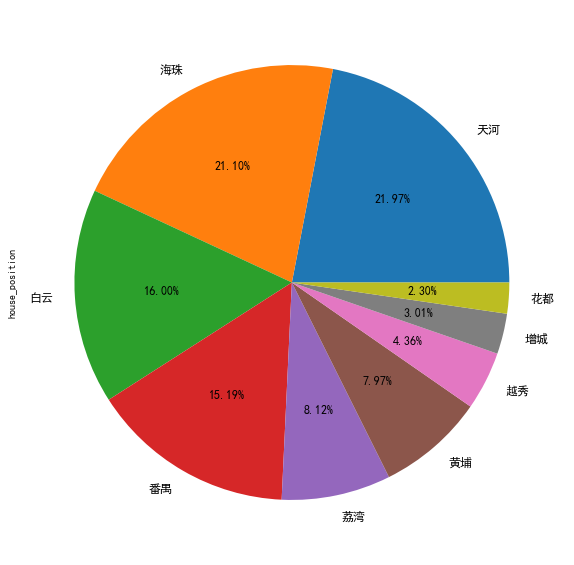

In [5]:
data.house_position.value_counts().plot.pie(autopct='%.2f%%',fontsize=12,figsize=(10,10))
data.house_position.agg(['value_counts']).T

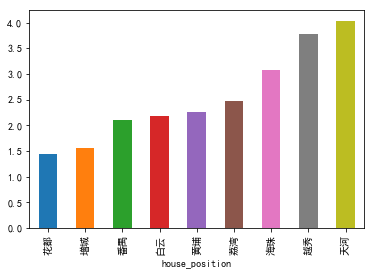

In [6]:
data.unit_price.groupby(data.house_position).mean().sort_values(ascending=True).plot.bar()

In [7]:
from pyecharts import Map
from pyecharts import Geo

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "c:\users\11060\appdata\local\programs\python\python36\lib\site-packages\lml\utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [10]:
quyu = ['花都区','增城区','番禺区','白云区','黄埔区','荔湾区','海珠区','越秀区','天河区']
danjia = [1.403236,1.561185,2.104040,2.154553,2.244508,2.445613,3.064517,3.689216,3.956770]
map3 = Map("广州单价图", width=1000, height=1000)
map3.add("", quyu, danjia, visual_range=[1, 5], maptype='广州', is_visualmap=True,is_label_show=True,visual_text_color='#000')
map3.render(path="广州地图.html")

Text(0.5, 0, '单位房价')

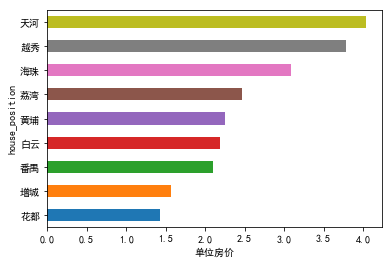

In [8]:
data.unit_price.groupby(data.house_position).mean().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('单位房价')

Text(0, 0.5, '单位房价')

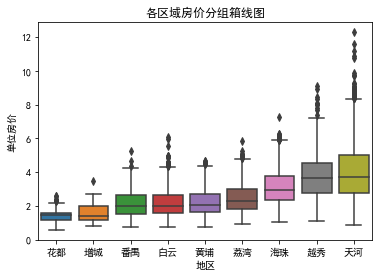

In [9]:
data_1 = data[['house_position','unit_price']]
data_1.house_position = data_1.house_position.astype('category')
data_1.house_position.cat.set_categories(['花都','增城','番禺','白云','黄埔','荔湾','海珠','越秀','天河'],inplace=True)
sns.boxplot(x='house_position',y='unit_price',data=data_1)
plt.title("各区域房价分组箱线图")
plt.xlabel('地区')
plt.ylabel('单位房价')

Text(0.5, 0, '房间数量')

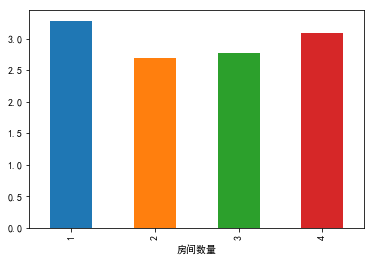

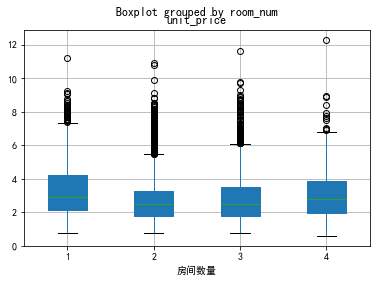

In [10]:
data_2 = data[['room_num','unit_price']]
data_2.unit_price.groupby(data_2.room_num).mean().plot(kind='bar')
plt.xlabel('房间数量')
data_2.boxplot(by='room_num',patch_artist=True)
plt.xlabel('房间数量')

Text(0.5, 0, '客厅数量')

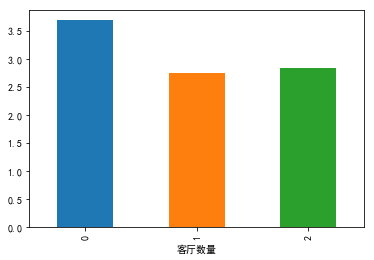

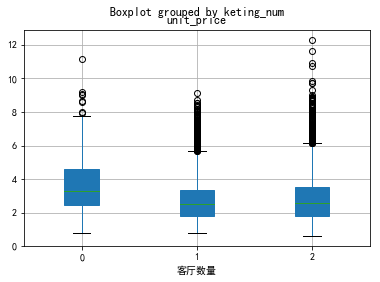

In [11]:
data_3 = data[['keting_num','unit_price']]
data_3.unit_price.groupby(data_3.keting_num).mean().plot(kind='bar')
plt.xlabel('客厅数量')
data_3.boxplot(by='keting_num',patch_artist=True)
plt.xlabel('客厅数量')

楼层之间差距很小，相关性弱

Text(0.5, 0, '楼层')

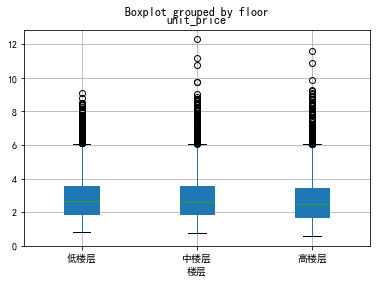

In [12]:
data_4=data[['floor','unit_price']]
data_4.floor=data_4.floor.astype("category")
data_4.floor.cat.set_categories(["低楼层","中楼层","高楼层"],inplace=True)
data_4.sort_values(by=['floor'],inplace=True)
data_4.boxplot(by='floor',patch_artist=True)
plt.xlabel('楼层')

地铁和电梯对房价影响显著

Text(0.5, 0, '电梯')

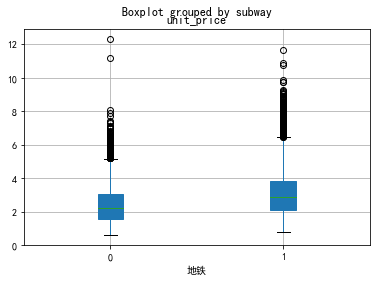

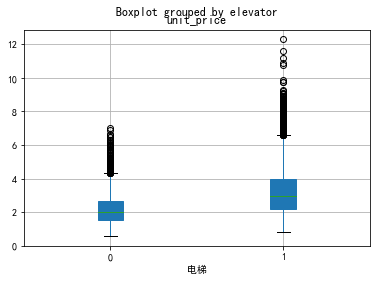

In [13]:
data_5 = data[['subway','unit_price']]
data_6 = data[['elevator','unit_price']]
data_5.boxplot(by='subway',patch_artist=True)
plt.xlabel('地铁')
data_6.boxplot(by='elevator',patch_artist=True)
plt.xlabel('电梯')

Text(0.5, 0, '装修类型')

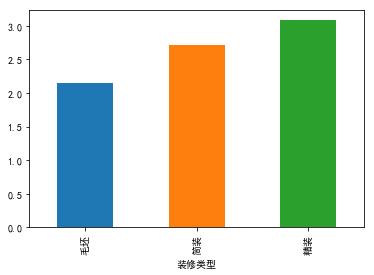

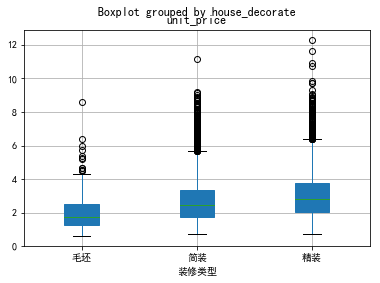

In [14]:
data_7 = data[['house_decorate','unit_price']]
data_7.unit_price.groupby(data_7.house_decorate).mean().plot(kind='bar')
plt.xlabel('装修类型')
data_7.boxplot(by='house_decorate',patch_artist=True)
plt.xlabel('装修类型')

装修类型对房价的单因素方差分析

In [37]:
from statsmodels.stats.anova import anova_lm
model = ols('unit_price ~ C(house_decorate)',data = data_7).fit()
print('装修类型的单因素方差分析P值：',anova_lm(model)._values[0][4])

装修类型的单因素方差分析P值： 6.978866153481211e-10


画出单价和面积的直方图和拟合标准正态分布图、QQ图

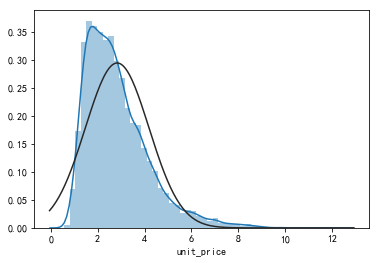

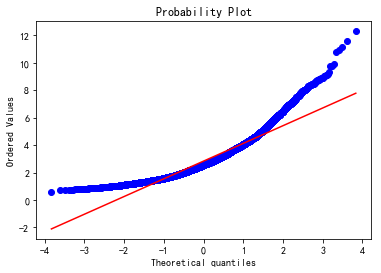

In [15]:
from scipy.stats import *
from sklearn.preprocessing import StandardScaler
from scipy import stats
sns.distplot(data['unit_price'],fit=norm)
fig = plt.figure()
plt.xlabel('单位单价(万/平方)')
res = stats.probplot(data.unit_price,plot=plt)
plt.show()

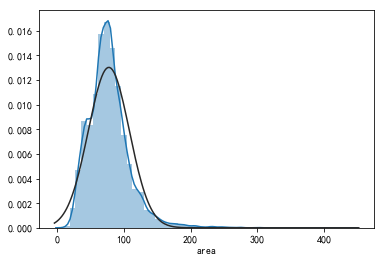

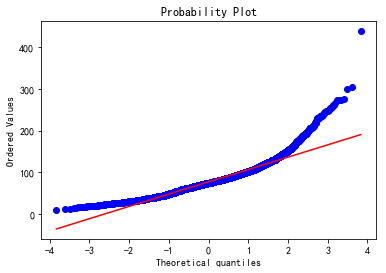

In [16]:
sns.distplot(data['area'],fit=norm)
fig = plt.figure()
plt.xlabel('面积')
res = stats.probplot(data.area,plot=plt)
plt.show()

对面积和单价分别求对数，得出新的QQ图和拟合标准正态分布图

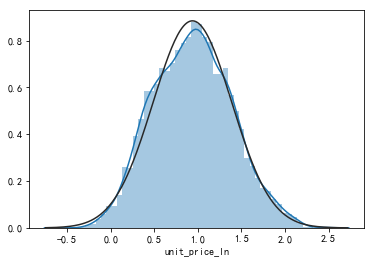

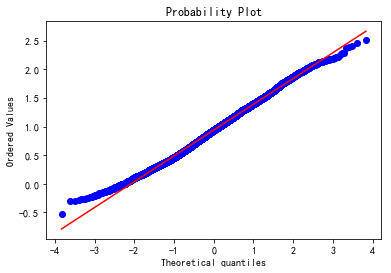

In [17]:
data['unit_price_ln'] = np.log(data.unit_price)
sns.distplot(data['unit_price_ln'],fit=norm)
fig = plt.figure()
res = stats.probplot(data.unit_price_ln,plot=plt)
plt.show()

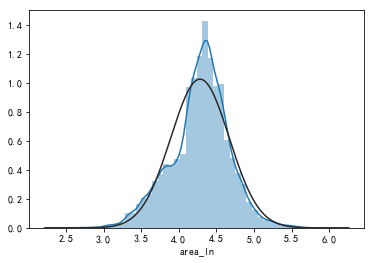

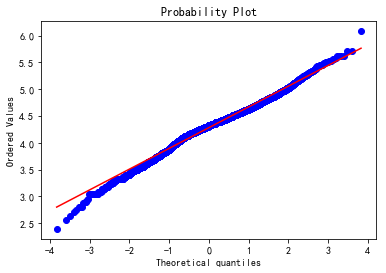

In [18]:
data['area_ln'] = np.log(data.area)
sns.distplot(data['area_ln'],fit=norm)
fig = plt.figure()
res = stats.probplot(data.area_ln,plot=plt)
plt.show()

In [19]:
def get_sample(df, sampling="simple_random", k=1, stratified_col=None):
    """
    对输入的 dataframe 进行抽样的函数

    参数:
        - df: 输入的数据框 pandas.dataframe 对象

        - sampling:抽样方法 str
            可选值有 ["simple_random", "stratified", "systematic"]
            按顺序分别为: 简单随机抽样、分层抽样、系统抽样

        - k: 抽样个数或抽样比例 int or float
            (int, 则必须大于0; float, 则必须在区间(0,1)中)
            如果 0 < k < 1 , 则 k 表示抽样对于总体的比例
            如果 k >= 1 , 则 k 表示抽样的个数；当为分层抽样时，代表每层的样本量

        - stratified_col: 需要分层的列名的列表 list
            只有在分层抽样时才生效

    返回值:
        pandas.dataframe 对象, 抽样结果
    """
    import random
    import pandas as pd
    from functools import reduce
    import numpy as np
    import math
    
    len_df = len(df)
    if k <= 0:
        raise AssertionError("k不能为负数")
    elif k >= 1:
        assert isinstance(k, int), "选择抽样个数时, k必须为正整数"
        sample_by_n=True
        if sampling is "stratified":
            alln=k*df.groupby(by=stratified_col)[stratified_col[0]].count().count() # 有问题的
            #alln=k*df[stratified_col].value_counts().count() 
            if alln >= len_df:
                raise AssertionError("请确认k乘以层数不能超过总样本量")
    else:
        sample_by_n=False
        if sampling in ("simple_random", "systematic"):
            k = math.ceil(len_df * k)
        
    #print(k)

    if sampling is "simple_random":
        print("使用简单随机抽样")
        idx = random.sample(range(len_df), k)
        res_df = df.iloc[idx,:].copy()
        return res_df

    elif sampling is "systematic":
        print("使用系统抽样")
        step = len_df // k+1          #step=len_df//k-1
        start = 0                  #start=0
        idx = range(len_df)[start::step]  #idx=range(len_df+1)[start::step]
        res_df = df.iloc[idx,:].copy()
        #print("k=%d,step=%d,idx=%d"%(k,step,len(idx)))
        return res_df

    elif sampling is "stratified":
        assert stratified_col is not None, "请传入包含需要分层的列名的列表"
        assert all(np.in1d(stratified_col, df.columns)), "请检查输入的列名"
        
        grouped = df.groupby(by=stratified_col)[stratified_col[0]].count()
        if sample_by_n==True:
            group_k = grouped.map(lambda x:k)
        else:
            group_k = grouped.map(lambda x: math.ceil(x * k))
        
        res_df = df.head(0)
        for df_idx in group_k.index:
            df1=df
            if len(stratified_col)==1:
                df1=df1[df1[stratified_col[0]]==df_idx]
            else:
                for i in range(len(df_idx)):
                    df1=df1[df1[stratified_col[i]]==df_idx[i]]
            idx = random.sample(range(len(df1)), group_k[df_idx])
            group_df = df1.iloc[idx,:].copy()
            res_df = res_df.append(group_df)
        return res_df

    else:
        raise AssertionError("sampling is illegal")

In [20]:
data_7 = get_sample(data,sampling="stratified",k=200,stratified_col=['house_position'])
print(data_7.shape)
data_7.head()

(1800, 13)


,area,built_date,elevator,floor,house_decorate,house_orientation,house_position,room_num,keting_num,subway,unit_price,unit_price_ln,area_ln
5247,98.99,2011,1,高楼层,精装,北,增城,3,2,0,2.6064,0.957970,4.595019
10840,210.00,2011,1,高楼层,毛坯,南,增城,4,2,0,0.8810,-0.126698,5.347108
10662,118.00,2002,1,低楼层,毛坯,北,增城,3,2,0,1.0831,0.079827,4.770685
10730,148.19,2002,1,中楼层,精装,北,增城,3,2,0,1.0123,0.012225,4.998495
6479,88.00,2011,1,中楼层,精装,西,增城,2,2,0,2.2728,0.821013,4.477337


In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

print("house_position的P值为:%.4f" %sm.stats.anova_lm(ols('unit_price ~ C(house_position)',data=data_7).fit())._values[0][4])
print("room_num的P值为:%.4f" %sm.stats.anova_lm(ols('unit_price ~ C(room_num)',data=data_7).fit())._values[0][4])
print("keting_num的P值为:%.4f" %sm.stats.anova_lm(ols('unit_price ~ C(keting_num)',data=data_7).fit())._values[0][4])
print("floor的P值为:%.4f" %sm.stats.anova_lm(ols('unit_price ~ C(floor)',data=data_7).fit())._values[0][4])
print("house_decorate的P值为:%.4f" %sm.stats.anova_lm(ols('unit_price ~ C(house_decorate)',data=data_7).fit())._values[0][4])
print("subway的P值为:%.4f" %sm.stats.anova_lm(ols('unit_price ~ C(subway)',data=data_7).fit())._values[0][4])
print("elevator的P值为:%.4f" %sm.stats.anova_lm(ols('unit_price ~ C(elevator)',data=data_7).fit())._values[0][4])

house_position的P值为:0.0000
room_num的P值为:0.0000
keting_num的P值为:0.0000
floor的P值为:0.1044
house_decorate的P值为:0.0000
subway的P值为:0.0000
elevator的P值为:0.0000


可以看出楼层不显著，后面建模可以将楼层去掉

In [22]:
data_8=pd.get_dummies(data[['house_position','floor','house_decorate']])
data_8.head()

,house_position_增城,house_position_天河,house_position_海珠,house_position_番禺,house_position_白云,house_position_花都,house_position_荔湾,house_position_越秀,house_position_黄埔,floor_中楼层,floor_低楼层,floor_高楼层,house_decorate_毛坯,house_decorate_简装,house_decorate_精装
0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [23]:
data_8.drop(['house_position_增城','floor_高楼层','house_decorate_毛坯'],axis=1,inplace=True)
data_8.head()

,house_position_天河,house_position_海珠,house_position_番禺,house_position_白云,house_position_花都,house_position_荔湾,house_position_越秀,house_position_黄埔,floor_中楼层,floor_低楼层,house_decorate_简装,house_decorate_精装
0,1,0,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,1,0,0,1


In [24]:
data_9 = pd.concat([data_8, data[['elevator', 'subway','keting_num','room_num','area','unit_price']]],axis=1)
data_9.head()

,house_position_天河,house_position_海珠,house_position_番禺,house_position_白云,house_position_花都,house_position_荔湾,house_position_越秀,house_position_黄埔,floor_中楼层,floor_低楼层,house_decorate_简装,house_decorate_精装,elevator,subway,keting_num,room_num,area,unit_price
0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,2,4,437.00,12.2884
1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,2,3,91.27,11.6139
2,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,30.00,11.1667
3,1,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,67.00,10.8956
4,1,0,0,0,0,0,0,0,1,0,0,1,1,1,2,2,66.95,10.7543


In [25]:
lm1 = ols("""unit_price ~ + house_position_天河+house_position_海珠+house_position_番禺+house_position_白云
          + house_position_花都+ house_position_荔湾+house_position_越秀+house_position_黄埔+house_decorate_简装+house_decorate_精装
          + elevator+subway+area+room_num+keting_num
          """, data=data_9).fit()
lm1_summary = lm1.summary()
lm1_summary 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             unit_price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     609.5
Date:                Sun, 07 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:18:27   Log-Likelihood:                -15433.
No. Observations:               10878   AIC:                         3.090e+04
Df Residuals:                   10862   BIC:                         3.102e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.6875      0.097      7.119      0.000       0.498       0.877
house_position_天河     2.4299      0.062     39.294      0.000       2.309       2.551
house_position_海珠     1.5676      0.063     24.843      0.000       1.444       1.691
house_position_番禺     0.8200      0.062     13.236      0.000       0.699       0.941
house_position_白云     0.9496      0.063     15.132      0.000       0.827       1.073
house_position_花都    -0.1273      0.085     -1.499      0.134      -0.294       0.039
house_position_荔湾     1.0654      0.068     15.590      0.000       0.931       1.199
house_position_越秀     2.3392      0.077     30.472      0.000       2.189       2.490
house_position_黄埔     0.7933      0.068     11.616      0.000       0.659       0.927
house_decorate_简装     0.0945      0.077      1.226      0.220      -0.057       0.246
house_decorate_精装     0.3493      0.077      4.515      0.000       0.198       0.501
elevator              0.7867      0.022     36.244      0.000       0.744       0.829
subway                0.2603      0.022     11.717      0.000       0.217       0.304
area                  0.0019      0.001      3.286      0.001       0.001       0.003
room_num             -0.1022      0.022     -4.648      0.000      -0.145      -0.059
keting_num            0.0210      0.022      0.963      0.336      -0.022       0.064
==============================================================================
Omnibus:                     1954.932   Durbin-Watson:                   0.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5272.706
Skew:                           0.971   Prob(JB):                         0.00
Kurtosis:                       5.804   Cond. No.                     1.55e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

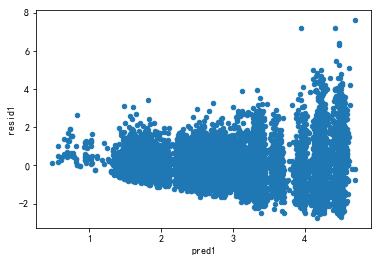

In [26]:
data_9['pred1']=lm1.predict(data_9)
data_9['resid1']=lm1.resid
data_9.plot('pred1','resid1',kind='scatter')

In [27]:
data_9['unit_price_ln'] = np.log(data_9['unit_price'])  #对单价取对数
data_9['area_ln'] = np.log(data_9['area'])#对面积取对数

In [28]:
lm2 = ols("""unit_price_ln ~ + house_position_天河+house_position_海珠+house_position_番禺+house_position_白云
          + house_position_花都+ house_position_荔湾+house_position_越秀+house_position_黄埔
          + elevator+subway+area_ln+room_num+keting_num""", data=data_9).fit()
lm2_summary = lm2.summary()
lm2_summary  #回归结果展示

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          unit_price_ln   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     814.4
Date:                Sun, 07 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:18:28   Log-Likelihood:                -3079.6
No. Observations:               10878   AIC:                             6187.
Df Residuals:                   10864   BIC:                             6289.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2959      0.056      5.241      0.000       0.185       0.407
house_position_天河     0.8822      0.020     45.073      0.000       0.844       0.921
house_position_海珠     0.6723      0.020     33.607      0.000       0.633       0.712
house_position_番禺     0.3634      0.020     18.475      0.000       0.325       0.402
house_position_白云     0.4110      0.020     20.733      0.000       0.372       0.450
house_position_花都    -0.1161      0.027     -4.280      0.000      -0.169      -0.063
house_position_荔湾     0.4858      0.022     22.406      0.000       0.443       0.528
house_position_越秀     0.8943      0.024     36.577      0.000       0.846       0.942
house_position_黄埔     0.3827      0.022     17.622      0.000       0.340       0.425
elevator              0.3179      0.007     46.233      0.000       0.304       0.331
subway                0.0805      0.007     11.279      0.000       0.066       0.094
area_ln              -0.0490      0.016     -3.087      0.002      -0.080      -0.018
room_num              0.0040      0.007      0.551      0.581      -0.010       0.018
keting_num            0.0275      0.007      3.752      0.000       0.013       0.042
==============================================================================
Omnibus:                      113.240   Durbin-Watson:                   0.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.535
Skew:                           0.030   Prob(JB):                     1.78e-16
Kurtosis:                       2.605   Cond. No.                         113.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

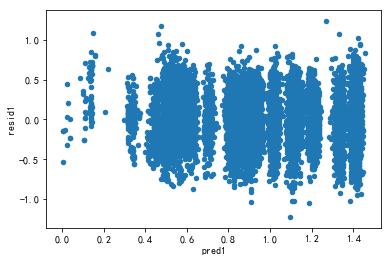

In [29]:
data_9['pred1']=lm2.predict(data_9)
data_9['resid1']=lm2.resid
data_9.plot('pred1','resid1',kind='scatter') 

In [30]:
lm3 = ols("""unit_price_ln ~ + (house_position_天河+house_position_海珠+house_position_番禺+house_position_白云
          + house_position_花都+ house_position_荔湾+house_position_越秀+house_position_黄埔)*subway*(house_decorate_简装+house_decorate_精装)
          *elevator+area_ln+room_num+keting_num""", data=data_9).fit()
lm3_summary = lm3.summary()
lm3_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          unit_price_ln   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     115.0
Date:                Sun, 07 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:18:28   Log-Likelihood:                -2745.3
No. Observations:               10878   AIC:                             5699.
Df Residuals:                   10774   BIC:                             6457.
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                               1.0350      0.228      4.539      0.000       0.588       1.482
house_position_天河                                       0.2640      0.271      0.974      0.330      -0.267       0.795
house_position_海珠                                      -0.1165      0.383     -0.304      0.761      -0.868       0.635
house_position_番禺                                      -0.0187      0.256     -0.073      0.942      -0.520       0.482
house_position_白云                                      -0.2954      0.245     -1.207      0.227      -0.775       0.184
house_position_花都                                      -1.3076      0.383     -3.411      0.001      -2.059      -0.556
house_position_荔湾                                      -0.3902      0.313     -1.247      0.212      -1.004       0.223
house_position_越秀                                       0.5085      0.167      3.036      0.002       0.180       0.837
house_position_黄埔                                      -0.1608      0.129     -1.242      0.214      -0.415       0.093
subway                                                  0.0261      0.225      0.116      0.908      -0.415       0.467
house_position_天河:subway                               -0.0373      0.315     -0.119      0.906      -0.654       0.579
house_position_海珠:subway                                0.4377      0.384      1.141      0.254      -0.314       1.190
house_position_番禺:subway                               -0.4071      0.288     -1.414      0.157      -0.971       0.157
house_position_白云:subway                               -0.1047      0.218     -0.480      0.631      -0.532       0.323
house_position_花都:subway                                0.0173      0.229      0.075      0.940      -0.431       0.465
house_position_荔湾:subway                                0.3482      0.384      0.908      0.364      -0.404       1.100
house_position_越秀:subway                               -0.0927      0.227     -0.408      0.683      -0.538       0.352
house_position_黄埔:subway                               -0.3050      0.259     -1.177      0.239      -0.813       0.203
house_decorate_简装                                      -0.2608      0.234     -1.115      0.265      -0.719       0.198
house_decorate_精装                                      -0.2935      0.228     -1.287      0.198      -0.741       0.154
house_position_天河:house_decorate_简装                     0.1109      0.282      0.393      0.694      -0.442       0.664
house_position_天河:house_decorate_精装                     0.2542      0.279      0.911      0.362      -0.293       0.801
house_position_海珠:house_decorate_简装                     0.3634      0.392      0.92

In [31]:
test=data_9.head(1)
test.T

,0
house_position_天河,1.000000
house_position_海珠,0.000000
house_position_番禺,0.000000
house_position_白云,0.000000
house_position_花都,0.000000
house_position_荔湾,0.000000
house_position_越秀,0.000000
house_position_黄埔,0.000000
floor_中楼层,1.000000
floor_低楼层,0.000000


In [32]:
import math
test['house_position_天河']=0
test['house_position_番禺']=1
test['floor_中楼层'] = 0
test['floor_高楼层'] = 1
test['house_decorate_精装'] = 1
test['house_decorate_毛坯'] = 0
test['room_num']=3
test['keting_num']=1
test['area_ln']=np.log(100)
test['subway']=1
test['elevator']=1
print("单位面积房价：",round(math.exp(lm3.predict(test)),2),"万元/平方米")
print("总价：",round(math.exp(lm3.predict(test))*100,2),"万元")

单位面积房价： 2.46 万元/平方米
总价： 245.67 万元
